In [12]:
%matplotlib inline
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def normalize(vec):
    if not np.any(vec):
        raise ValueError("can't normalize the zero vector")
    return vec / np.linalg.norm(vec)

In [14]:
def angle_between(v1, v2):
    return np.arccos(
        np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    )

In [15]:
def ortho_xy(v):
    x, y, z = v
    return np.array([y, -x, z])

In [16]:
def get_ecc(M, pos, vel):
    h_vec = np.cross(pos, vel)
    return np.cross(vel, h_vec) / M - normalize(pos)

In [17]:
def get_ellipse_pts(M, pos, vel):
    e_vec = get_ecc(M, pos, vel)
    e = np.linalg.norm(e_vec)
    if e >= 1:
        return False
        
    e_hat = normalize(e_vec)
    r = np.linalg.norm(pos)
    th = angle_between(pos, e_vec)
    a = r * (1+e*np.cos(th)) / (1-e**2)
    b = a*np.sqrt(1-e**2)
    rp = 2 * a / ((1 + e) / (1 - e) + 1)
    
    p1 = rp * e_hat
    p2 = p1 - 2*e_hat*a
    c = (p1+p2)/2
    b_hat = ortho_xy(e_hat)
    p3 = c - b_hat*b
    p4 = c + b_hat*b
    return np.array([pos, p1, p2, p3, p4, c])

In [18]:
def get_conic_coeffs(pts):
    x = pts[:, 0]
    y = pts[:, 1]
    M = np.vstack([x**2, x * y, y**2, x, y]).T
    return np.linalg.lstsq(M, np.ones(5), rcond=-1)[0]

In [20]:
def draw_ellipse(coeffs):
    A, B, C, D, E, F = coeffs
    conic = A * X**2 + B * X * Y + C * Y**2 + D * X + E * Y
    plt.contour(X, Y, (conic), [1])

In [21]:
def plot_ellipse(M=1.0, x=100, y=0, vr=0.01, vth=np.pi/2):
    pos = np.array([x, y, 0])
    vel = vr*np.array([np.cos(vth), np.sin(vth), 0])
    e_vec = get_ecc(M, pos, vel)
    e = np.linalg.norm(e_vec)
    print(f"e={e:0.5f}")
    if e < 1:
        pts = get_ellipse_pts(M, pos, vel)
        A, B, C, D, E  = get_conic_coeffs(pts[:-1])
        conic = A * X**2 + B * X * Y + C * Y**2 + D * X + E * Y
    
    plt.plot(pts[1:3, 0], pts[1:3,1], color="red", alpha=0.5)
    plt.plot(pts[3:5, 0], pts[3:5,1], color="green", alpha=0.5)
    
    plt.contour(X, Y, (conic), [1], colors="purple", alpha=0.5)
    
    plt.plot(0, 0, "o", markersize=15, c="orange")
    plt.plot(2*pts[5,0], 2*pts[5,1], "o", markersize=5, c="red")
    plt.plot(x, y, "o", markersize=5, c="blue")
    
    vx, vy = 300 * vr * np.array([np.cos(vth), np.sin(vth)])
    plt.arrow(x, y, vx, vy, head_width=2)

    plt.gca().set_aspect("equal")
    plt.xlim(-150, 150)
    plt.ylim(-150, 150)
    plt.xticks([], [])
    plt.yticks([], [])
    
    plt.show()

e=0.99000


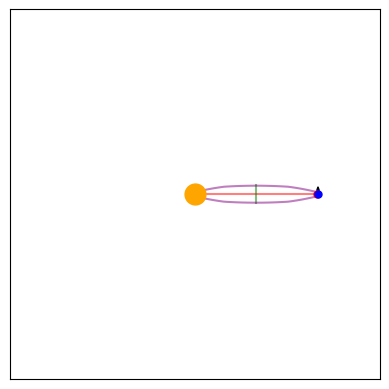

interactive(children=(FloatSlider(value=1.0, description='M', max=20.0, min=1.0, step=0.01), IntSlider(value=1…

In [22]:
interactive_plot = interactive(plot_ellipse, M=(1,20,0.01), x=(-100,100,1), y=(-100, 100, 1), vr=(0.001, 0.25, 0.001), vth=(0, 2*np.pi, 2*np.pi/360))
output = interactive_plot.children[-1]
output.layout.height = "500px"
interactive_plot